# Plotting and Visualization

We'll use `matplotlib` library to create plots and figures. Create informative
Visualizations are an important task in data analysis, it could be part of the
exploratory process, a way of generating ideas for models or as interactive
visualization for the web.

matplotlib has a depth functionality, here we train the basics but the best 
resources are matplotlib gallery and documentations for learning
advanced features.

matplotlib documentation: https://matplotlib.org/ 

## Index

- [A Brief matplotlib API Primer](#a-brief-matplotlib-api-primer)
    - [Figures and Subplots](#figures-and-subplots)
        - [Adjusting the spacing around subplots](#adjusting-the-spacing-around-subplots)
    - [Colors, Markers, and Line Styles](#colors-markers-and-line-styles)
    - [Tick, labels and Legends](#ticks-labels-and-legends)
        - [Setting the title, axis labels, ticks, and tick labels](#setting-the-title-axis-labels-ticks-and-tick-labels)
        - [Adding Legends](#adding-legends)
    - [Annotations and Drawing on a Subplot](#annotations-and-drawing-on-a-subplot)
    - [Saving plot to a file](#saving-plot-to-a-file)
    - [Matplotlib configuration](#matplotlib-configuration)
- [Plotting with pandas and seaborn](#plotting-with-pandas-and-seaborn)


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # Convention for matplotlib
import warnings
from datetime import datetime 

%matplotlib inline
warnings.filterwarnings("ignore")

## A Brief matplotlib API Primer

Array for test visualization:  [0 1 2 3 4 5 6 7 8 9]


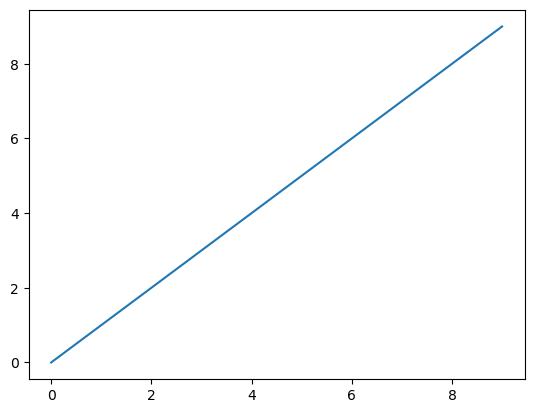

In [2]:
data = np.arange(10)

print("Array for test visualization: ", data)

plt.plot(data)

### Figures and Subplots

Plots reside within a Figure object: `fig = plt.figure()`. 

*`matplotlib.pyplot.subplots`options*
|Argument| Description|
|--:|---|
|nrows |Number of rows of subplots|
|ncols |Number of columns of subplots|
|sharex |All subplots should use the same x-axis ticks (adjusting the xlim will affect all subplots)|
|sharey |All subplots should use the same y-axis ticks (adjusting the ylim will affect all subplots)|
|subplot_kw |Dictionary of keywords passed to add_subplot call used to create each subplot|
|**fig_kw |Additional keywords to subplots are used when creating the figure, such as `plt.subplots(2, 2, figsize=(8, 6))`|

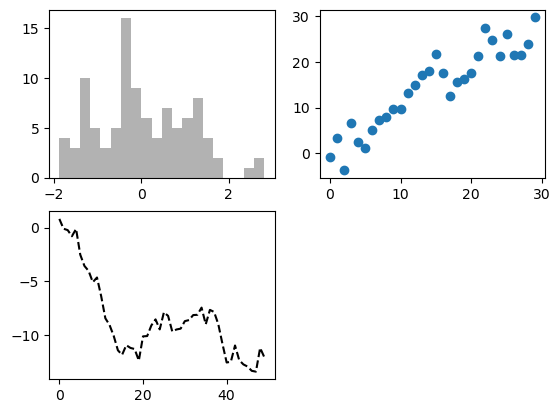

In [3]:
# Creating a Figure object
fig = plt.figure()

# Generating three empty subplots 
# Shape 2x2 and follows the order: 1, 2 and 3.
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# Creating a plot in the third subplot
ax3.plot(np.random.standard_normal(50).cumsum(), 
         color="black", 
         linestyle="--"); # this semicolon suppress the output reference

# Creating plot 1 (histogram) and 2 (scatter)
ax1.hist(np.random.standard_normal(100), 
         bins=20, 
         color="black", 
         alpha=0.3 # Setting transparency
         );
ax2.scatter(np.arange(30), 
            np.arange(30) + 3 * np.random.standard_normal(30));


Figure axes: 
 [[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


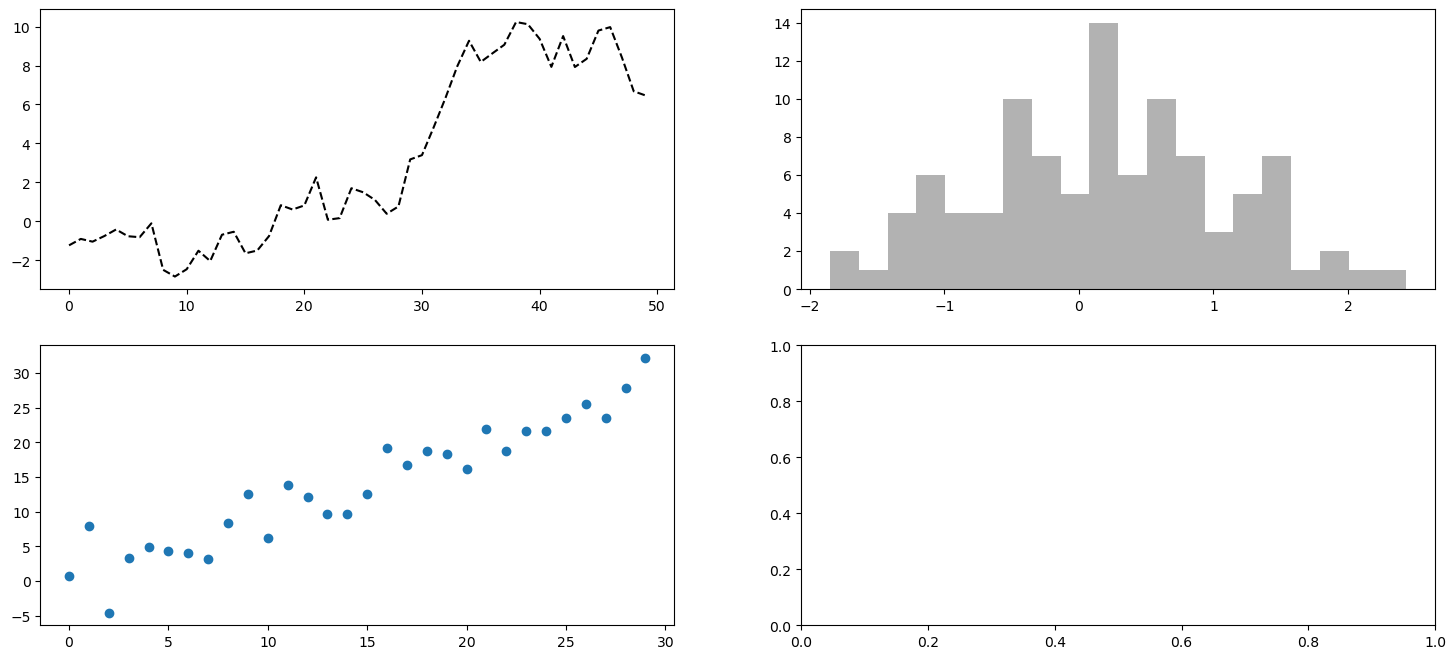

In [4]:
"""
    Alternative way to create 2x2 figure more convenient
"""

fig, ax = plt.subplots(2,2, figsize=(18,8));
print("Figure axes: \n", ax)

# Creating a plot in the third subplot
ax[0,0].plot(np.random.standard_normal(50).cumsum(), 
         color="black", 
         linestyle="--"); # this semicolon suppress the output reference

# Creating plot 1 (histogram) and 2 (scatter)
ax[0,1].hist(np.random.standard_normal(100), 
         bins=20, 
         color="black", 
         alpha=0.3 # Setting transparency
         );
ax[1,0].scatter(np.arange(30), 
            np.arange(30) + 3 * np.random.standard_normal(30));

#### Adjusting the spacing around subplots

We can use `fig.subplots_adjust()` to reduce padding around the outside of the 
subplots and in spacing between subplots.

`fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)`

The options `wspace` and `hspace` controls the percent of the figure width 
and height. The axis labels can overlap since matplotlib does not check it.

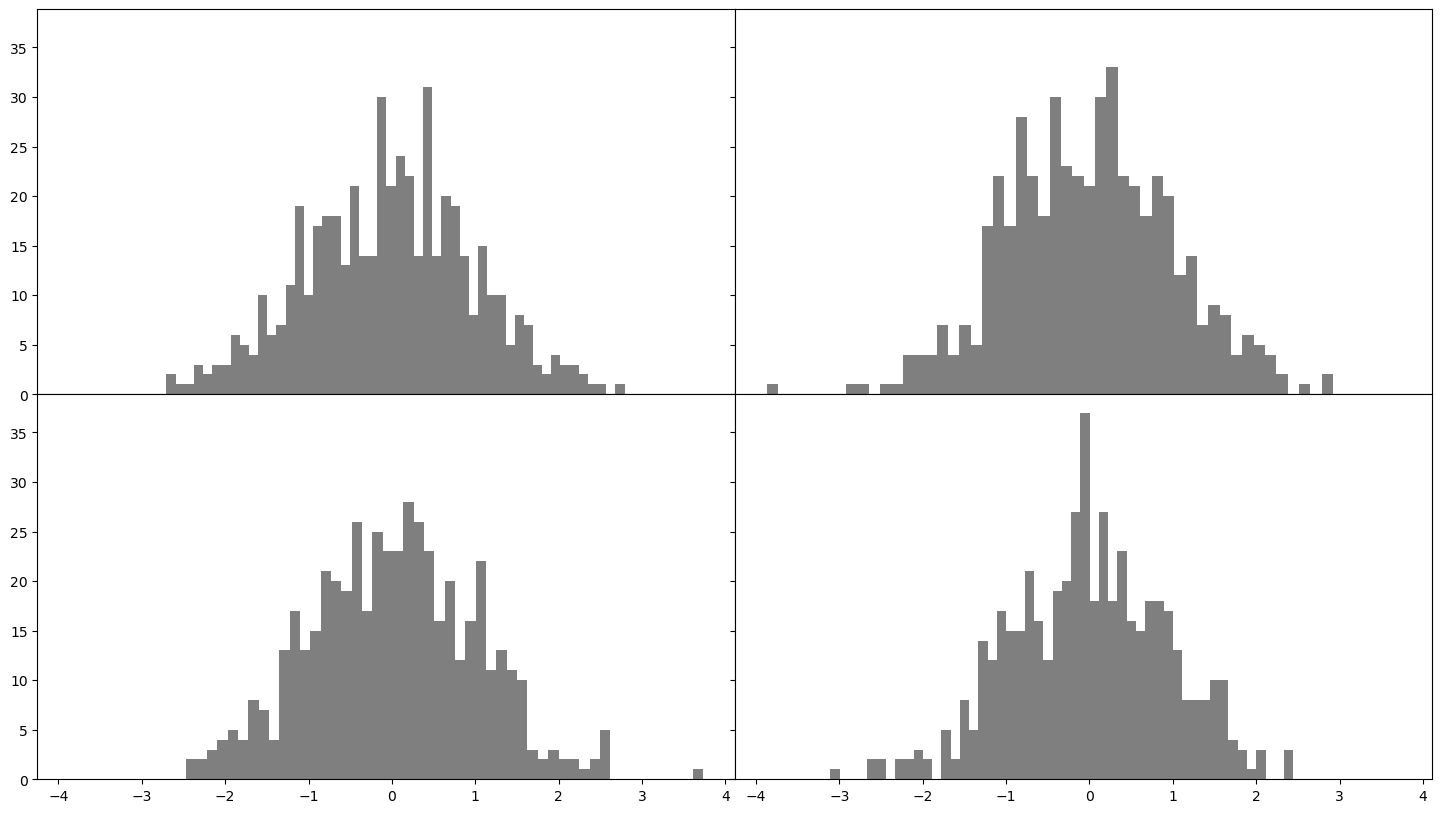

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(18,10), sharex=True, sharey=True);
for i in range(2):
    for j in range(2):
        ax[i, j].hist(np.random.standard_normal(500), bins=50,
        color="black", alpha=0.5)

fig.subplots_adjust(wspace=0, hspace=0);

### Colors, Markers, and Line Styles

We can edit the line plot with:
```python
ax.plot(x, y, 
    linestyle="--",
    color="lime",
    marker="o",
    drawstyle="steps-post"
    )
```

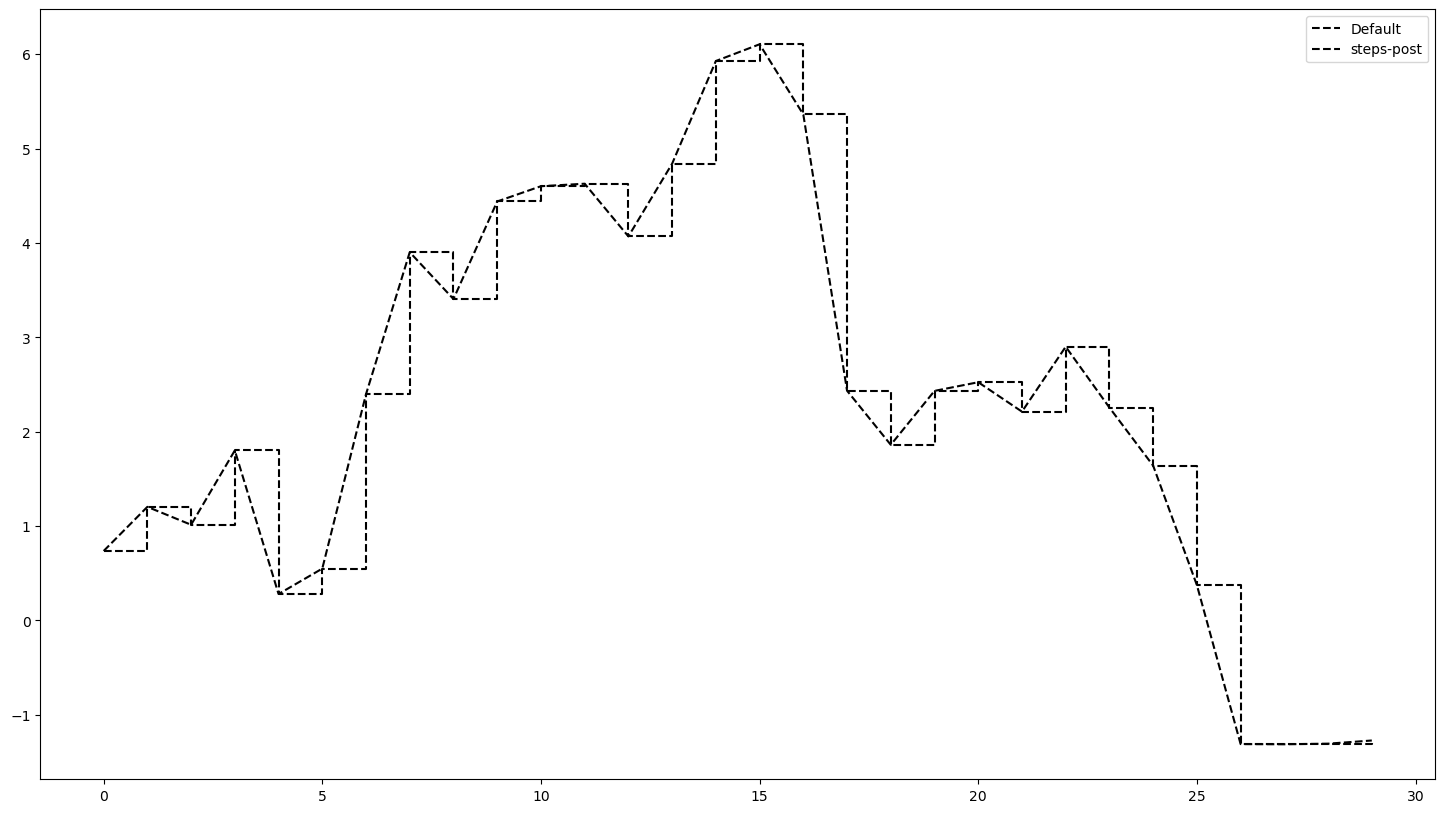

In [6]:
data = np.random.standard_normal(30).cumsum()

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot()

ax.plot(data, color="black", 
        linestyle="dashed", 
        label="Default");
ax.plot(data, color="black", 
        linestyle="--",
        drawstyle="steps-post",
        label="steps-post");

ax.legend();


### Ticks, Labels, and Legends

Method to decorate plots: 
- `xlim`: plot range (e.h., `ax.xlim([0,10])` sets x-axis range to 0-10)
- `xticks`: tick locations
- `xticklabels`: tick labels

This methods called with no arguments returns the current parameter value.
And called with parameters sets the value. In addition, such mehods act on the 
most recently created 'AxesSubplot', and each corresponds to two methods on the
subplot (xlim has 'ax.get_xlim' and 'ax.set_xlim').

#### Setting the title, axis labels, ticks, and tick labels

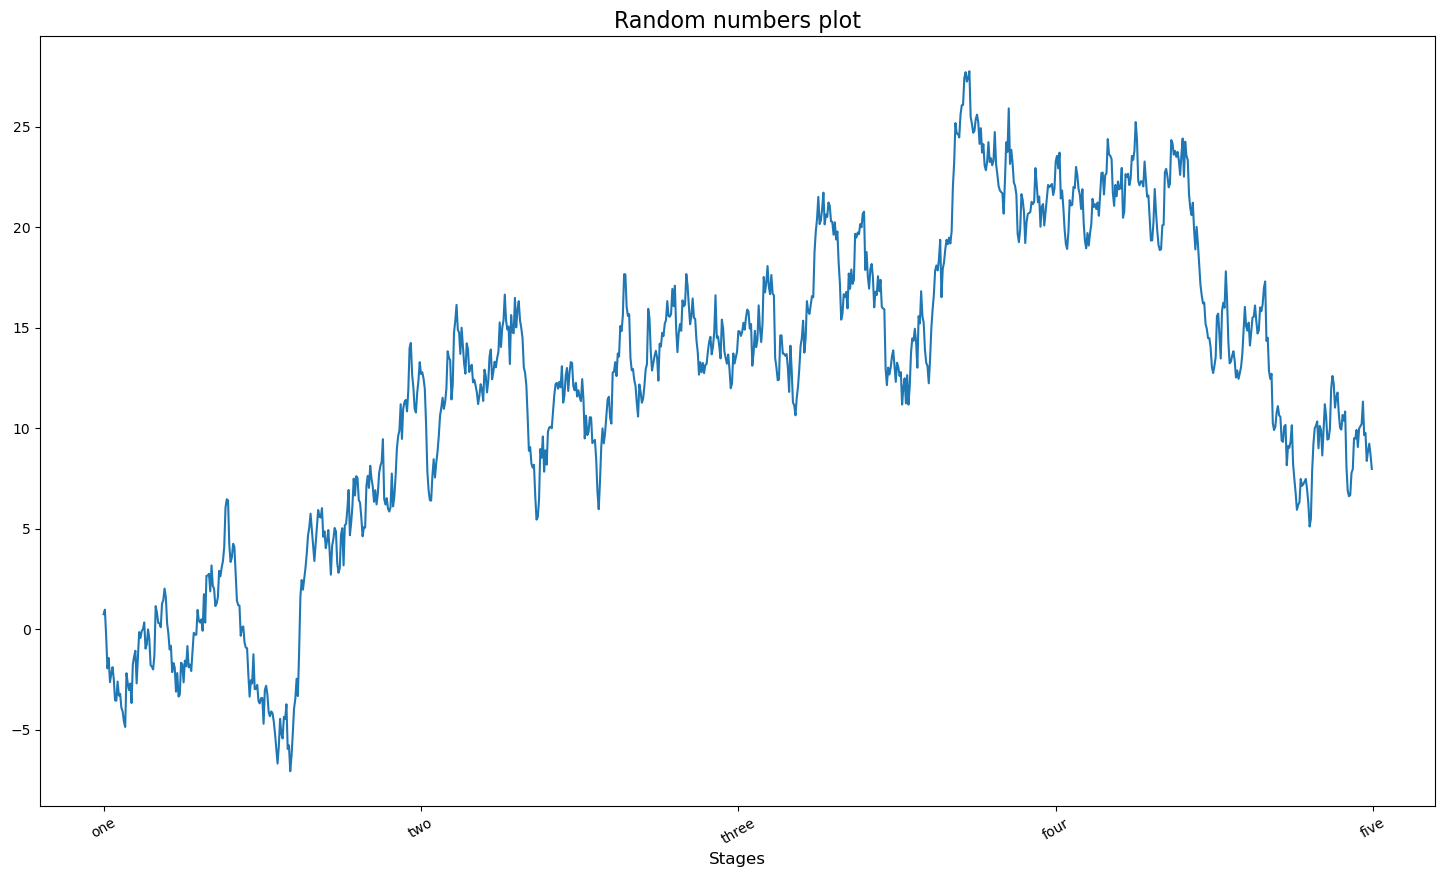

In [13]:
fig, ax = plt.subplots(figsize=(18,10))

ax.plot(np.random.standard_normal(1000).cumsum());

tics = ax.set_xticks(np.arange(0,1001,250));
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize=10);
# tick labels on X with 30 degrees of rotation

ax.set_xlabel("Stages", fontsize=12);
ax.set_title("Random numbers plot", fontsize=16);

#### Adding legends

The `label` argument in the plot is used to fill `ax.legend()`.

`ax.legend()` has several arguments, you can see the options with `ax.legend?`.
Also, we can exclude elements on the legend, to do that we can pass no label
or `label="_nolegend_"`.

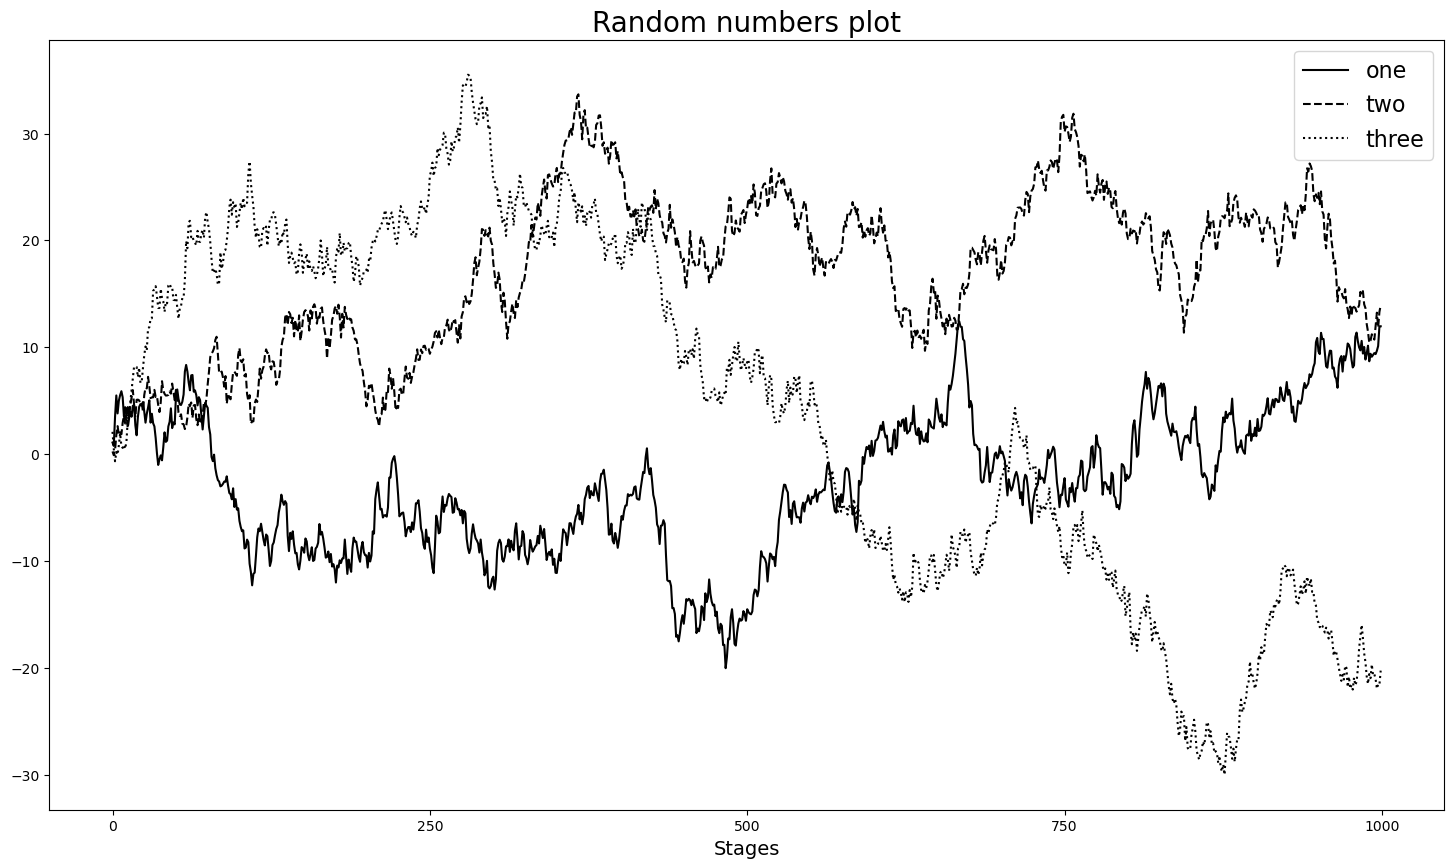

In [19]:
fig, ax = plt.subplots(figsize=(18,10))

ax.plot(np.random.standard_normal(1000).cumsum(), color="black", label="one");
ax.plot(np.random.standard_normal(1000).cumsum(), 
        color="black", label="two", linestyle="--");
ax.plot(np.random.standard_normal(1000).cumsum(), 
        color="black", label="three", linestyle=":");

tics = ax.set_xticks(np.arange(0,1001,250));

ax.set_xlabel("Stages", fontsize=14);
ax.set_title("Random numbers plot", fontsize=20);
ax.legend(fontsize=16);


### Annotations and Drawing on a Subplot

Now, we'll add annotations and text to given coordinates on the plot:
```python
ax.text(x, y, "annotation", family="monospace", fontsize=10)
```

Dataset: https://github.com/wesm/pydata-book/blob/3rd-edition/examples/spx.csv 

`ax.annotate()` draw labels at specific coordinates.

In [22]:
with open("datasets/spx.csv") as file:
    data = pd.read_csv(file, index_col=0, parse_dates=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPX     5472 non-null   float64
dtypes: float64(1)
memory usage: 85.5 KB


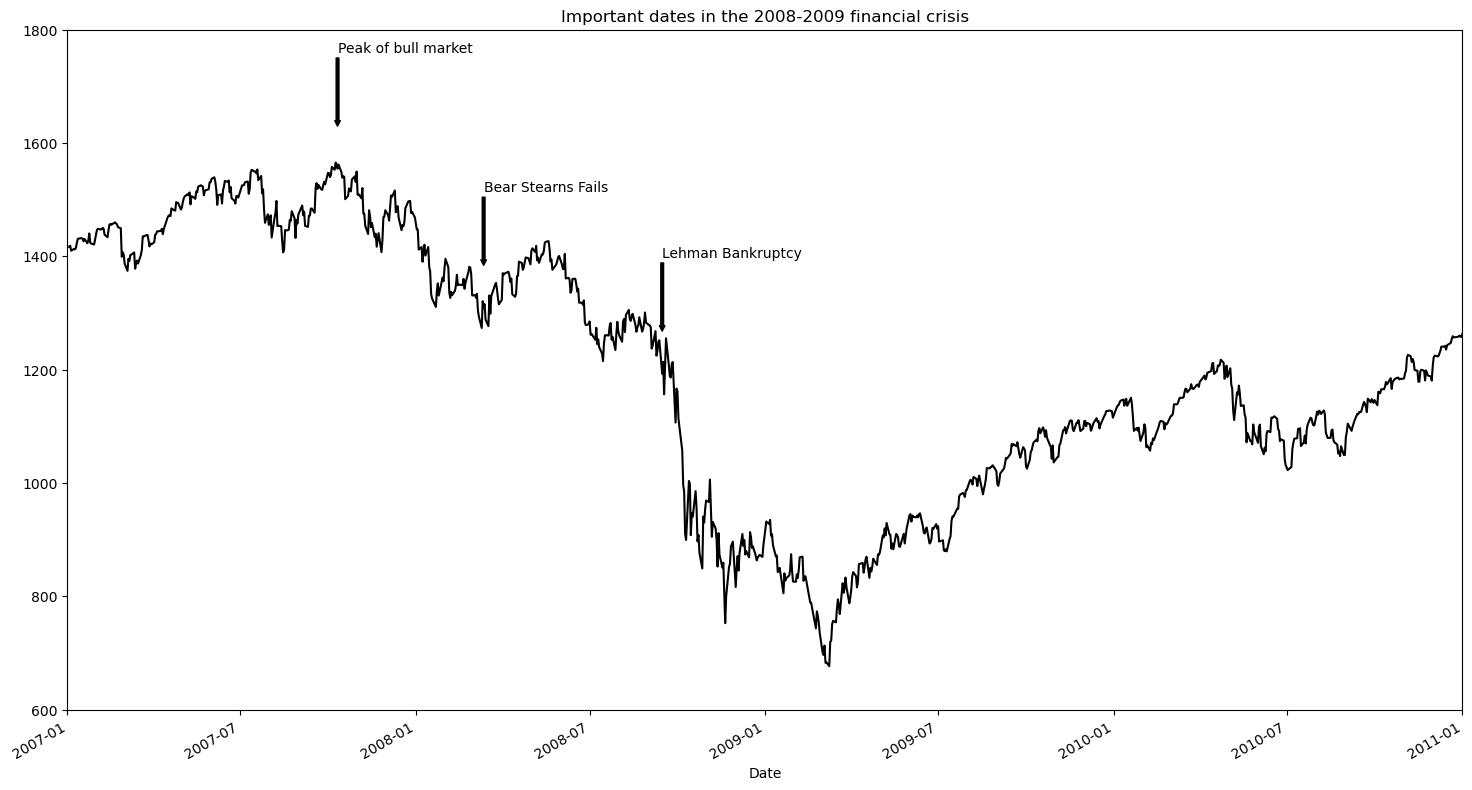

In [25]:
spx = data["SPX"]

fig, ax = plt.subplots(figsize=(18,10))
spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

ax.set_xlim(["1/1/2007", "1/1/2011"]) # focus between this dates
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis");

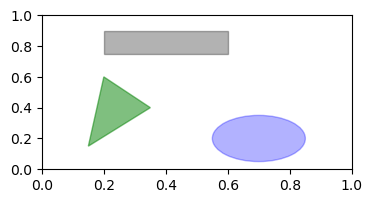

In [7]:
# Plot with patches to add a shape to this plot

fig, ax = plt.subplots(figsize=(4,2))

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon);

### Saving plot to a file

The active figure can be saved with `fig.savefig("filepath.svg")`. We can 
change the file type using other extension, like .pdf, .png, etc. With png 
we can specified `dpi=300` argument.

*`fig.savefig()` options*
|Argument|Description|
|--:|---|
|fname|String containing a filepath or a Python file-like object. The figure format is inferred from the file extension (e.g., .pdf for PDF or .png for PNG).|
|dpi|The figure resolution in dots per inch; defaults to 100 in IPython or 72 in Jupyter out of the box but can be configured.|
|facecolor, edgecolor|The color of the figure background outside of the subplots; "w" (white), by default.|
|format|The explicit file format to use ("png", "pdf", "svg", "ps", "eps", ...)|

### Matplotlib Configuration

matplotlib comes with default configurations for size, spacing, colors... This
behaviour can be change with `plt.rc()`. All the configuration settings are 
found in the `plt.rcParams` dictionary, and it can be restored to default
settings calling `plt.rcdefaults()` function.

The first argument in `plt.rc()` is what you want to customize, such as "axes",
"xtick", "grid", "legend"...
```python
plt.rc("figure", figsize=(16,8))
plt.rc("font", familt="monospace", weight="bold", size=8)
```

## Plotting with pandas and seaborn

Pandas Series and DataFrames have built-in methods that simplify creating 
visualizations. Series object's index is passed to matplotlib for plotting on 
the x-axis, can be disabled with `use_index=False` argument.

*Series.plot method arguments*
|Argument|Description|
|--:|---|
|label|Label for plot legend|
|ax|matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot|
|style|Style string, like "ko--", to be passed to matplotlib|
|alpha|The plot fill opacity (from 0 to 1)|
|kind|Can be "area", "bar", "barh", "density", "hist", "kde", "line", or "pie"; defaults to "line"|
|figsize|Size of the figure object to create|
|logx|Pass True for logarithmic scaling on the x axis; pass "sym" for symmetric logarithm that permits negative values|
|logy|Pass True for logarithmic scaling on the y axis; pass "sym" for symmetric logarithm that permits negative values|
|title|Title to use for the plot|
|use_index|Use the object index for tick labels|
|rot|Rotation of tick labels (0 through 360)|
|xticks|Values to use for x-axis ticks|
|yticks|Values to use for y-axis ticks|
|xlim|x-axis limits (e.g., [0, 10])|
|ylim|y-axis limits|
|grid|Display axis grid (off by default)|

*DataFrame-specific plot arguments*
|Argument|Description|
|--:|---|
|subplots |Plot each DataFrame column in a separate subplot|
|layouts |2-tuple (rows, columns) providing layout of subplots|
|sharex |If subplots=True, share the same x-axis, linking ticks and limits|
|sharey |If subplots=True, share the same y-axis|
|legend |Add a subplot legend (True by default)|
|sort_columns |Plot columns in alphabetical order; by default uses existing column order|

<Axes: >

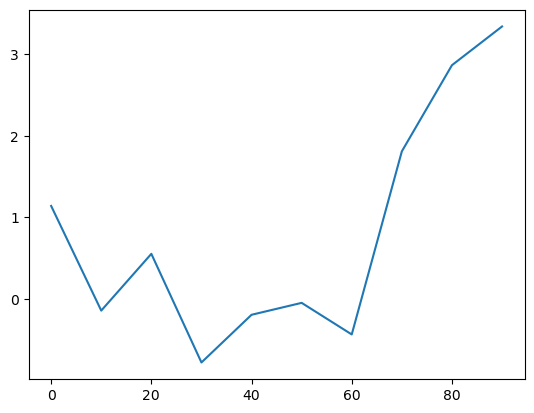

In [15]:
ser = pd.Series(np.random.standard_normal(10).cumsum(), 
                index=np.arange(0, 100, 10))

ser.plot()

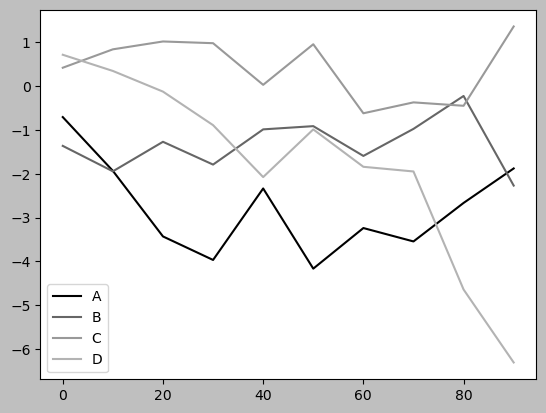

In [57]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),           
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
plt.style.use('grayscale')
df.plot();

### Bar Plots

To visualize a Series frequency we can generate a bar plot with:
`ser.value_counts().plot.bar()`

Dataset: https://github.com/wesm/pydata-book/blob/3rd-edition/examples/tips.csv


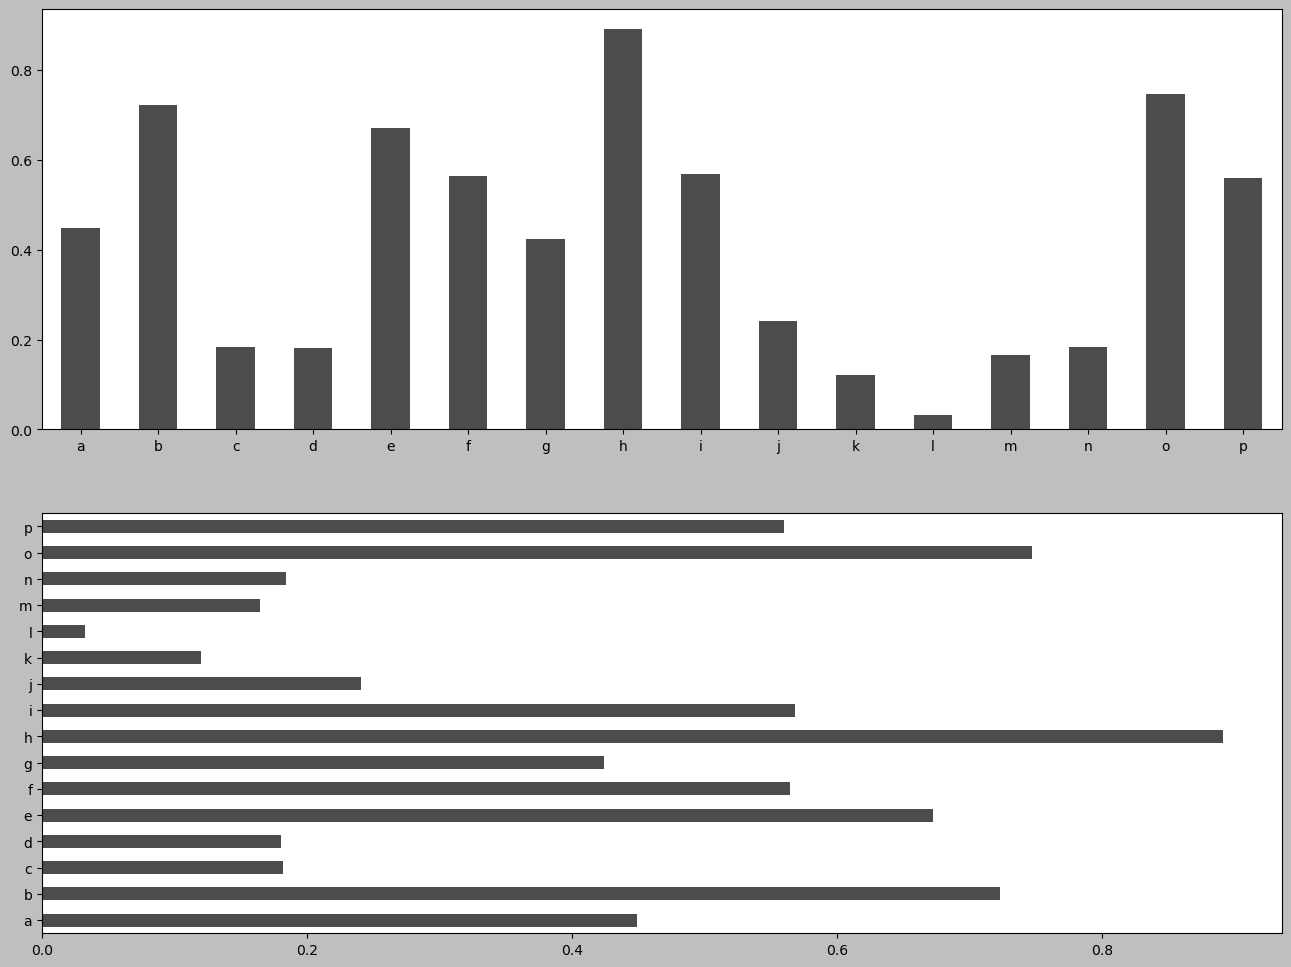

In [61]:
fig, axes = plt.subplots(2, 1, figsize=(16,12))
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))

data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

axes[0].tick_params(axis='x', rotation=0)

In [62]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))

df

Genus,A,B,C,D
one,0.164600,0.400629,0.679960,0.304157
two,0.228139,0.192721,0.801703,0.439222
three,0.766956,0.828029,0.582648,0.311371
four,0.220984,0.888973,0.302036,0.342160
five,0.885862,0.269812,0.813848,0.455281
six,0.622227,0.787957,0.058234,0.234868


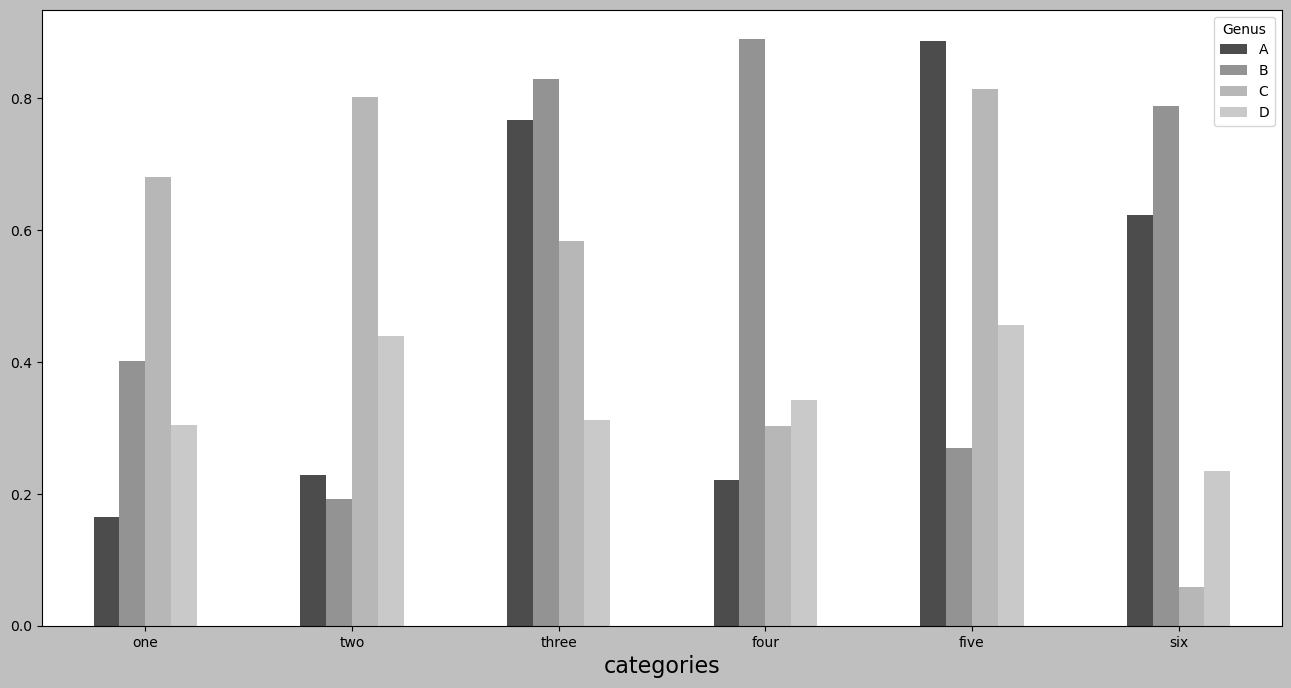

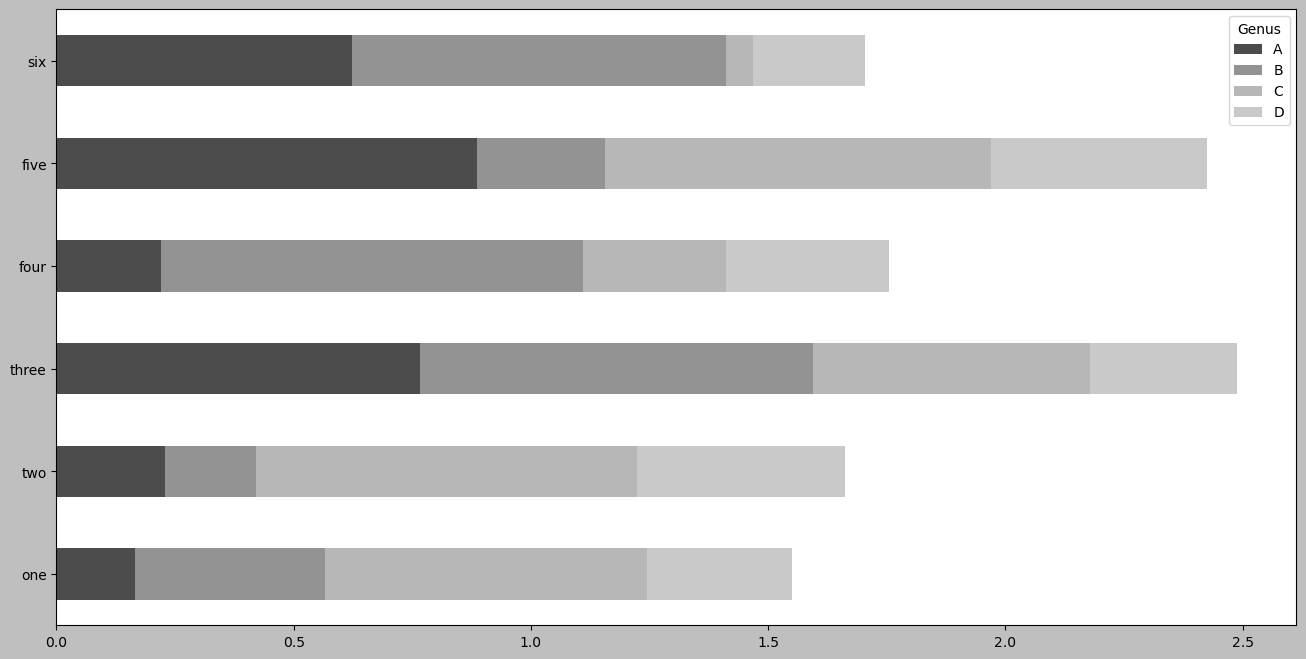

In [63]:
fig, ax = plt.subplots(figsize=(16,8))

df.plot.bar(ax=ax, alpha=0.7)

ax.set_xlabel("categories", fontsize=16)
ax.tick_params(axis='x', rotation=0);


df.plot.barh(stacked=True, alpha=0.7, figsize=(16,8));

In [64]:
from sinfo import sinfo
import session_info

#session_info.show()
print(sinfo())


-----
matplotlib          3.8.4
numpy               1.26.4
pandas              2.2.2
session_info        1.0.0
sinfo               0.3.1
-----
IPython             8.20.0
jupyter_client      8.6.0
jupyter_core        5.5.0
jupyterlab          4.0.11
-----
Python 3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.19045-SP0
8 logical CPU cores, Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
-----
Session information updated at 2024-07-09 19:08
None
